# Pandas 4: Time Series

In [3]:
import pandas as pd
import numpy as np
from pydataset import data
from matplotlib import pyplot as plt

### Problem 1

In [4]:
DJIA = pd.read_csv("DJIA.csv")
DJIA.index = pd.to_datetime(DJIA["DATE"])
DJIA = DJIA.drop(columns="DATE")
DJIA.dropna()
DJIA = DJIA[DJIA.VALUE != "."]
DJIA.VALUE = pd.to_numeric(DJIA.VALUE)
DJIA.head()

,VALUE
DATE,
2006-09-27,11689.24
2006-09-28,11718.45
2006-09-29,11679.07
2006-10-02,11670.35
2006-10-03,11727.34


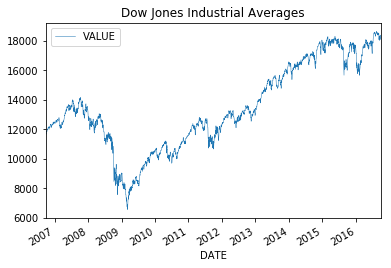

In [5]:
DJIA.plot(kind="line", y="VALUE", lw=.5, title="Dow Jones Industrial Averages")

### Problem 2

In [6]:
dt1 = pd.date_range(start='3/13/2008', periods=46, freq="WOM-1FRI")
dt3 = pd.date_range(start='3/13/2008', periods=46, freq="WOM-3FRI")
datetime = dt1.union(dt3)

paychecks = pd.read_csv("paychecks.csv")
paychecks.index = datetime
paychecks.columns = ["paycheck"]
paychecks.head()

,paycheck
2008-03-21,921.03
2008-04-04,962.46
2008-04-18,1035.97
2008-05-02,1078.59
2008-05-16,1110.97


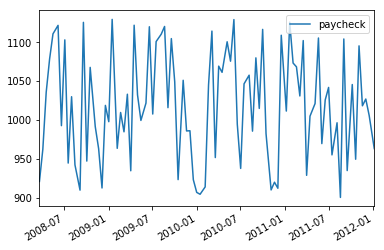

In [7]:
paychecks.plot()

### Problem 5

In [8]:
DJIA_change = DJIA - DJIA.shift(1)

In [9]:
print("Day with largest gain: ", DJIA_change.idxmax()[0])
print("Day with largest loss: ", DJIA_change.idxmin()[0])

Day with largest gain:  2008-10-13 00:00:00
Day with largest loss:  2008-09-29 00:00:00


In [10]:
DJIA_monthly = DJIA.resample("M").first()
DJIA_monthly_change = DJIA_monthly - DJIA_monthly.shift(1)

In [11]:
print("Month with largest gain: ", DJIA_monthly_change.idxmax()[0])
print("Month with largest loss: ", DJIA_monthly_change.idxmin()[0])

Month with largest gain:  2015-11-30 00:00:00
Month with largest loss:  2015-09-30 00:00:00


### Problem 6

In [12]:
def plot_DJIA_window(w):
    ax = plt.subplot(111)
    DJIA.plot(color="gray", lw=.3, ax=ax)
    DJIA.rolling(window=w).mean().plot(color='r', lw=1, ax=ax)
    DJIA.ewm(span=w).mean().plot(color='g', lw=1, ax=ax)
    DJIA.rolling(window=w).max().plot(color='b', lw=1, ax=ax)
    DJIA.rolling(window=w).min().plot(color='m', lw=1, ax=ax)
    ax.legend(["Actual", "Rolling Avg", "Exponential Avg", "Max Rolling", "Min Rolling"])
    ax.set_title("DJIA dataset with window or span of {}".format(w))
    plt.xlabel("Date")
    plt.ylabel("DJIA Value")
    plt.show()

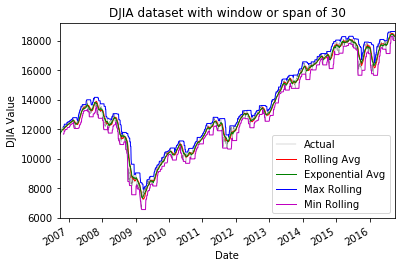

In [13]:
plot_DJIA_window(30)

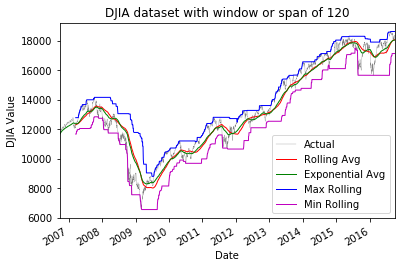

In [14]:
plot_DJIA_window(120)

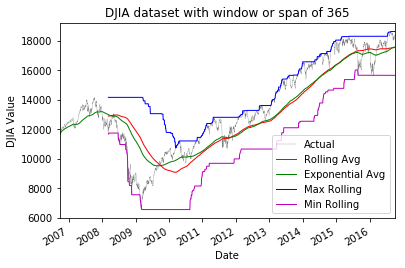

In [15]:
plot_DJIA_window(365)